In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [3]:
#read in the weather data 
df = pd.read_csv('weather.csv', index_col = 'datetime', parse_dates = True) #making datetime as the index 
df.drop(df.columns[[0]],axis = 1, inplace = True) #removing unknown column 


In [4]:

df.info()

#x as days two y-axis for temp and feelslike

#windspeed and feelslike 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2022-01-01 to 2022-10-16
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tempmax         289 non-null    float64
 1   tempmin         289 non-null    float64
 2   temp            289 non-null    float64
 3   feelslikemax    289 non-null    float64
 4   feelslikemin    289 non-null    float64
 5   feelslike       289 non-null    float64
 6   humidity        289 non-null    float64
 7   precip          289 non-null    float64
 8   precipprob      289 non-null    float64
 9   windspeed       289 non-null    float64
 10  cloudcover      289 non-null    float64
 11  solarradiation  289 non-null    float64
 12  solarenergy     289 non-null    float64
 13  uvindex         289 non-null    float64
 14  sunrise         289 non-null    object 
 15  sunset          289 non-null    object 
 16  conditions      289 non-null    object 
 17  hours           

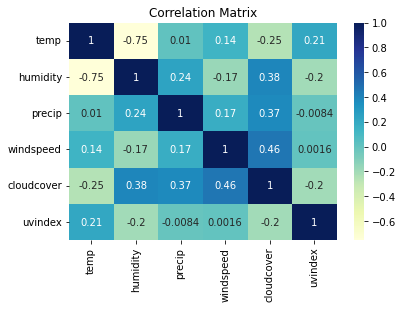

In [14]:
new_df = df[['temp', 'humidity','precip', 'windspeed', 'cloudcover', 'uvindex']]
matrix = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True).set(title='Correlation Matrix')
plt.savefig('matrix.png', )

In [32]:
fig = px.line(df, y = 'temp', title = 'Temperature Change Throughout 2022', labels = {'temp' : 'Temperature (F)', 'datetime' : 'Date'})
#plt.savefig('temp.png')

fig.update_layout(
    title={
        'text': 'Temperature Change Throughout 2022',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [33]:
fig = px.line(df, y = 'precip', labels = {'precip' : 'Precipitation (inches)', 'datetime' : 'Date'})
fig.update_layout(
    title={
        'text': 'Amount of Rainfall Throughout 2022',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [34]:
fig = px.scatter(df, x = 'cloudcover', y = 'precip', labels = {'cloudcover' : "Cloud Cover", "precip": "Precipitation (inches)"})
fig.update_layout(
    title={
        'text': 'Cloud Cover vs. Precipitation',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [10]:
px.scatter(df, x = 'humidity', y = 'cloudcover')

In [12]:
px.box(df, x="uvindex", y="conditions", color = 'conditions')

#sns.boxplot(data = df, x = 'uvindex', y = 'conditions')

In [37]:
 #difference of windspeed 
df['temp_difference'] = df['temp'] - df['feelslike']
fig = px.scatter(df, x='windspeed', y='temp_difference', labels = {'temp_difference' : 'Difference of Temp (F)', 'windspeed' : 'Windspeed (mph)'})


fig.update_layout(
    title={
        'text': 'Windspeed and Temperature Feeling',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
